In the model there are two free parameters.  $X$ is exogenous to the agent while a is specific to the agent.  Each agent $i$ is initilized with a value for its a parameter $a_i$ and a set of network conncetions $c_i$.  






















In each period the true value of $X$ is a linear function of the previous period's X value and the average value of $a$ across all agents.  

$$
X_t = X_{t-1} + w_1 \frac{1}{N} \sum_{i=1}^N a_{i,t}
$$

Agent's expression of $a_i$ is inversely related to the relative levels of $X$ and $k$, where $k$ is some constant.  Agents use a simple updating rule to chose their level of a in each period.  
$$
a_{i} = a_{i,t-1} - w_2(\hat{X_i} - k)
$$

where $\hat{X}$ (which can be thought of a $\mathbb{E}_i[X]$) is estimated with an adaptive expectations rule that incorporates social knowledge.

$$
    \hat{X}_{i}  = \hat{X}_{i,t-1} + w_1\ f(\{a \in c_i\})
$$
and the function $f(\{a \in c_i\})$ represents some aggregation rule across the $a$ values of all connected agents.

The parameters have the following intepertations:
$$
\begin{align}
& X: \text{ A systemic, society level variable }  \\
& a: \text{  A propensity for some agent-level behavior} \\ 
& w1: \text{ The amount by which today's level of }a \text{ affects the systemic variable X} \\
& w2: \text{  The amount by which today's level of }X \text{ decreases }a_i\text{, the propensity for agent-behavior} \\
& k: \text{ The level of X at which the agent would neither increase nor decrease her propensity for some behavior} 
\end{align}
$$

So, to make a concrete example, we can map these variables into a model of the credit cycle  \begin{align}
& X: \text{ Average lending risk (across the entire universe of agents)}  \\
& a_i: \text{ Agent's propensity to lend} \\ 
& w1: \text{ The amount by which today's level of lending} \text{ affects the systemic lending risk X} \\
& w2: \text{  The amount by which today's lending risk }X \text{ affects }a_i\text{ agent's propensity to lend} \\
& k: \text{ The level of risk at which the agent would neither increase nor decrease her propensity to lend} 
\end{align} 

In [1854]:
import networkx as nx
import random
from copy import copy
import matplotlib.pyplot as plt
from math import log1p

class Agent(object):
    
    def __init__(self, idNum, parameters,model):
        self.idNum = idNum #get an id number
        self.model = model #get the model obejct so it can be referenced
        self.connections = model.environment.neighbors(idNum) # figure out which agents are connected
        for k,v in parameters.items(): #loop through all keyword arguments
            # assert(k in self.__class__.__allowed) #make sure all the obejcts passed are compatible with base class, if applicable
            setattr(self,k,v) #assign the kwargs as object attributes
        if self.hetAgent:
            self.a = self.a + random.choice([1,3])
        self.aList = [self.a] #set up a list to hold values of a
            
    def step(self): #calculate the results for this period
        self.A = [self.model.agents[n].a for n in self.connections] #get the values of a for each connection
        self.A = sum(self.A) / len(self.A) #average the values
        self.X = self.X + self.w1*(self.A) #guess the next period's X based on neighbors' values of a
        #self.estX = self.X + self.w1*(self.A-self.aList[-1]) 
        
    def update(self): #update the agents value of a (once all other agents have finished their calculations)
        self.a = self.a + self.w2*(-(self.X-1)) #update a based on the estimate of X
        #self.a = self.a + self.w2*(-(self.deltaX-5))
        self.aList.append(self.a) #track the  periods' a value
        
class model(object): #define a model
    def __init__(self,N,parameters): #define the initiation of a model
        
        #In this model, I use a small world Watts Strogatz network
        self.environment = nx.watts_strogatz_graph(N,parameters['k'],parameters['p']) #N nodes, K neighbors connected, .25 probability of rewireing
        self.agents = [] #make an empty list to hold agents
        self.N = N #set number of agents
        self.k = parameters['k']
        self.X = parameters['X'] #set initial value of X
        self.w1 = parameters['w1'] #set initial value of the updating weight
        for i in range(self.N): #Loop through each agent
            agent = Agent(i,parameters,self) #ceate the agent
            self.agents.append(agent) #add the agent to the list of agents
            
    def step(self,periods): #run the entire model for a designated number of periods
        self.xList = [] #create a list to hold the X value in society at each moment
        for j in range(periods): #loop through each period
            aList = [] #create a list to track values of a in this period
            for i in range(self.N): #loop through each agent
                self.agents[i].step() #calculate the estimated values of X for each agent
            for i in range(self.N): #loop through each agent
                self.agents[i].update() #update agent's values of a for the period
                aList.append(self.agents[i].a) #collet updated a values
            a = sum(aList) / len(aList) #calculate social value of a
            self.X = self.X+self.w1*a  #update X based on this periods social level of a
            self.xList.append(self.X) #track this periods value of X


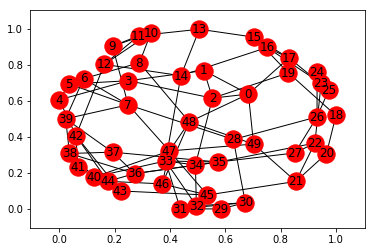

In [1855]:
testparams = {'a':3,'w1':.4,'w2':.4,'k':5,'p':.25,'X':3,'hetAgent':False}
test = model(50,testparams)
b = nx.draw_networkx(test.environment)
plt.show()

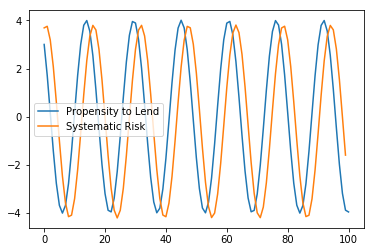

In [1856]:

test.step(100)
aLine, = plt.plot(test.agents[30].aList, label='Propensity to Lend')
XLine, = plt.plot(test.xList, label='Systematic Risk')
plt.legend(handles=[aLine,XLine])
plt.show()



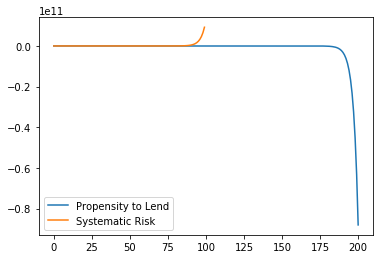

In [1857]:
test.step(100)
aLine, = plt.plot(test.agents[30].aList, label='Propensity to Lend')
XLine, = plt.plot(test.xList, label='Systematic Risk')
plt.legend(handles=[aLine,XLine])
plt.show()

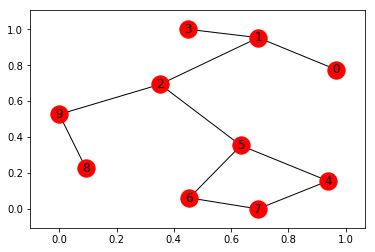

In [1859]:
testparams = {'a':3,'w1':.4,'w2':.4,'k':2,'p':.25,'X':3,'hetAgent':False}
test = model(10,testparams)
b = nx.draw_networkx(test.environment)
plt.show()

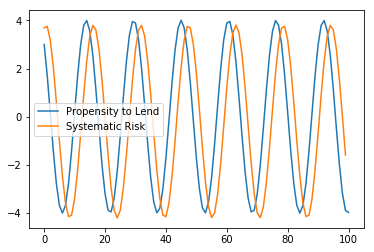

In [1860]:
test.step(100)
aLine, = plt.plot(test.agents[9].aList, label='Propensity to Lend')
XLine, = plt.plot(test.xList, label='Systematic Risk')
plt.legend(handles=[aLine,XLine])
plt.show()

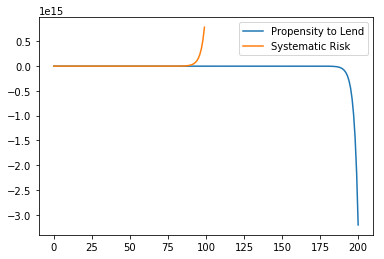

In [1861]:
test.step(100)
aLine, = plt.plot(test.agents[9].aList, label='Propensity to Lend')
XLine, = plt.plot(test.xList, label='Systematic Risk')
plt.legend(handles=[aLine,XLine])
plt.show()

There is no simple ABM model that can reproduce the Lotka Volterra predator-prey equations.  
$$
\frac{\partial a}{\partial t}= ra − αaX 
$$
$$
\frac{\partial X}{\partial t}= −δX + βaX  
$$

